In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("BRCA.csv")

In [4]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [6]:
df.tail()  #here are more NAN values

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [30]:
df.shape

(321, 13)

In [31]:
df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Patient_Status'],
      dtype='object')

## Data cleaning

In [35]:
# get unique values in each column of the DataFrame
for col in df.columns:
    print(col, df[col].unique())

Age [36. 43. 69. 56. 84. 53. 77. 40. 71. 72. 75. 52. 41. 37. 59. 62. 74. 87.
 45. 79. 47. 50. 61. 68. 49. 48. 46. 81. 89. 44. 55. 78. 85. 60. 57. 54.
 76. 58. 67. 63. 82. 65. 73. 51. 83. 80. 39. 66. 42. 38. 64. 29. 32. 70.
 90. 35. 88.]
Gender ['FEMALE' 'MALE']
Protein1 [ 8.0353e-02 -4.2032e-01  2.1398e-01  3.4509e-01  2.2155e-01 -8.1872e-02
 -6.9535e-02 -1.5175e-01 -5.6570e-01 -2.2305e-01 -3.7270e-01  1.7164e-01
 -1.6828e+00  5.6042e-01  1.4252e-01  2.9490e-01  1.9762e-01  1.0464e-01
 -2.4613e-01 -8.7485e-02 -5.9518e-01 -2.9870e-01  5.4240e-01 -3.6229e-02
  3.3186e-01 -6.2153e-02 -3.3045e-01  1.0352e+00 -2.2788e-01  6.4903e-01
 -2.8082e-01  5.9453e-01  2.3235e-01 -7.9765e-02  6.1643e-02 -5.5214e-01
 -3.4962e-01  7.0876e-01  2.8025e-01 -9.4840e-01  2.1728e-01  4.2538e-01
  1.4991e-01 -2.2853e-01 -4.2298e-01  8.2374e-01 -2.4978e-01  2.3113e-01
 -1.4872e+00  2.3917e-01 -6.6342e-01  2.0973e-01  7.4520e-01  7.2984e-01
  2.1197e-01  5.1178e-01  0.0000e+00 -2.8272e-01  3.5914e-01  6.7627e-02

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             321 non-null    float64
 1   Gender          321 non-null    object 
 2   Protein1        321 non-null    float64
 3   Protein2        321 non-null    float64
 4   Protein3        321 non-null    float64
 5   Protein4        321 non-null    float64
 6   Tumour_Stage    321 non-null    object 
 7   Histology       321 non-null    object 
 8   ER status       321 non-null    object 
 9   PR status       321 non-null    object 
 10  HER2 status     321 non-null    object 
 11  Surgery_type    321 non-null    object 
 12  Patient_Status  321 non-null    object 
dtypes: float64(5), object(8)
memory usage: 35.1+ KB


In [21]:
## we are droping unimportant features from the dataset


df.drop(['Patient_ID', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis=1, inplace=True)

# Check the updated DataFrame
print(df.head())

    Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680          III   
1  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505           II   
2  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270           II   
4  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990           II   

                       Histology ER status PR status HER2 status  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1             Mucinous Carcinoma  Positive  Positive    Negative   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Patient_Status  
0  Modified Radical Mastectomy          Alive  
1                   Lumpectomy           Dead  
2             

In [22]:
df.isnull().sum()  # still there is some null values are present

Age                0
Gender             7
Protein1           0
Protein2           0
Protein3           0
Protein4           0
Tumour_Stage       7
Histology          7
ER status          7
PR status          7
HER2 status        7
Surgery_type       7
Patient_Status    20
dtype: int64

In [23]:
# Fill missing values with median of the column
df.fillna(df.median(), inplace=True)

# Drop remaining rows with missing values
df.dropna(inplace=True)

# Check for missing values after filling
print(df.isnull().sum())

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64


In [25]:
df.duplicated()  #there is no duplicate values

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 321, dtype: bool

In [26]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.048001,-0.012523,-0.042382,0.100051
Protein1,-0.048001,1.000000,0.233269,-0.114400,0.255443
Protein2,-0.012523,0.233269,1.000000,-0.408015,0.083808
Protein3,-0.042382,-0.114400,-0.408015,1.000000,0.077341
Protein4,0.100051,0.255443,0.083808,0.077341,1.000000


In [32]:
df.value_counts()

Age   Gender  Protein1  Protein2  Protein3   Protein4  Tumour_Stage  Histology                       ER status  PR status  HER2 status  Surgery_type                 Patient_Status
29.0  FEMALE  -0.10568   0.93747  -0.621690   0.18637  I             Infiltrating Lobular Carcinoma  Positive   Positive   Negative     Simple Mastectomy            Dead              1
58.0  FEMALE   0.35774   1.51890  -0.307060   0.43625  III           Infiltrating Lobular Carcinoma  Positive   Positive   Negative     Modified Radical Mastectomy  Dead              1
64.0  FEMALE  -0.33866  -0.64147   1.657500  -0.42082  III           Infiltrating Ductal Carcinoma   Positive   Positive   Negative     Other                        Alive             1
              -0.34457   0.79012  -0.468870  -0.45557  I             Infiltrating Lobular Carcinoma  Positive   Positive   Negative     Lumpectomy                   Alive             1
              -0.96995  -0.76926   0.556800  -0.72015  I             Infiltratin

In [34]:
df_sorted = df.sort_values(by=['Age', 'Tumour_Stage'], ascending=True)

# print the sorted dataframe
print(df_sorted)

      Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
129  29.0  FEMALE -0.105680   0.93747 -0.621690  0.186370            I   
153  29.0  FEMALE  0.001814   0.89284 -0.678600 -0.178330           II   
130  32.0  FEMALE  0.125450   1.45650 -0.680300 -0.010378            I   
212  35.0  FEMALE -0.817530   1.79040 -1.041600  0.038522           II   
0    36.0  FEMALE  0.080353   0.42638  0.547150  0.273680          III   
..    ...     ...       ...       ...       ...       ...          ...   
20   87.0  FEMALE -0.087485   1.11110 -0.566920  1.223700           II   
251  88.0  FEMALE  0.204120   0.52534 -0.845440 -0.705650           II   
283  88.0  FEMALE -0.603350   1.38250  0.403570  0.269210           II   
48   89.0  FEMALE -0.249780  -0.35133 -0.099624  0.758340            I   
167  90.0  FEMALE -1.388200   0.77504  0.290880 -0.924270          III   

                          Histology ER status PR status HER2 status  \
129  Infiltrating Lobular Carcinoma  Pos

## one hot encoding


In [42]:
# Select the categorical columns to encode
cat_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=cat_cols)

# Display the encoded data
print(encoded_df.head())

    Age  Protein1  Protein2  Protein3  Protein4 Patient_Status  Gender_FEMALE  \
0  36.0  0.080353   0.42638   0.54715  0.273680          Alive              1   
1  43.0 -0.420320   0.57807   0.61447 -0.031505           Dead              1   
2  69.0  0.213980   1.31140  -0.32747 -0.234260          Alive              1   
3  56.0  0.345090  -0.21147  -0.19304  0.124270          Alive              1   
4  56.0  0.221550   1.90680   0.52045 -0.311990           Dead              1   

   Gender_MALE  Tumour_Stage_I  Tumour_Stage_II  ...  \
0            0               0                0  ...   
1            0               0                1  ...   
2            0               0                0  ...   
3            0               0                1  ...   
4            0               0                1  ...   

   Histology_Infiltrating Lobular Carcinoma  Histology_Mucinous Carcinoma  \
0                                         0                             0   
1                     

# EDA

<AxesSubplot:>

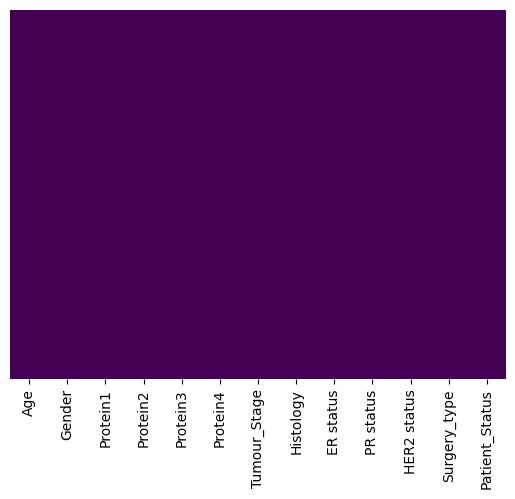

In [36]:
# We are using heatmap to check the null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

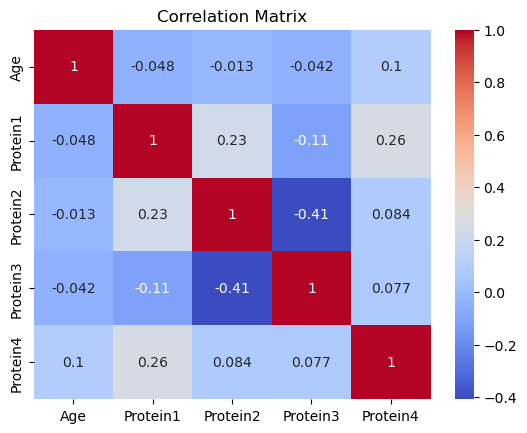

In [37]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

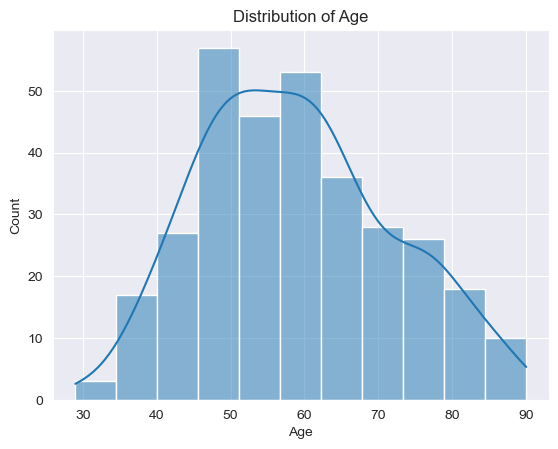

In [93]:
# Distribution of age
sns.histplot(x='Age', data=df, kde=True)
plt.title('Distribution of Age')
plt.show()

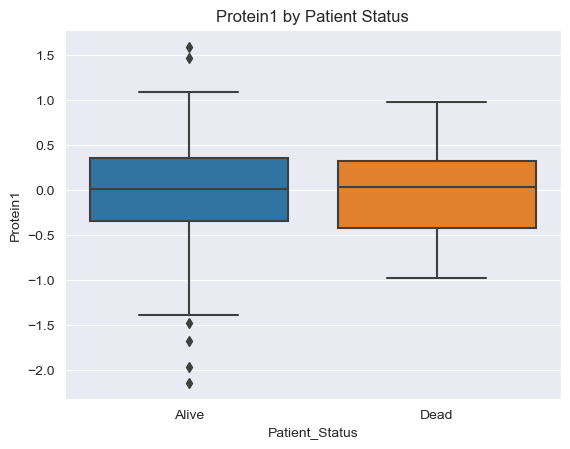

In [94]:
# Box plot of protein levels by patient status
sns.boxplot(x='Patient_Status', y='Protein1', data=df)
plt.title('Protein1 by Patient Status')
plt.show()

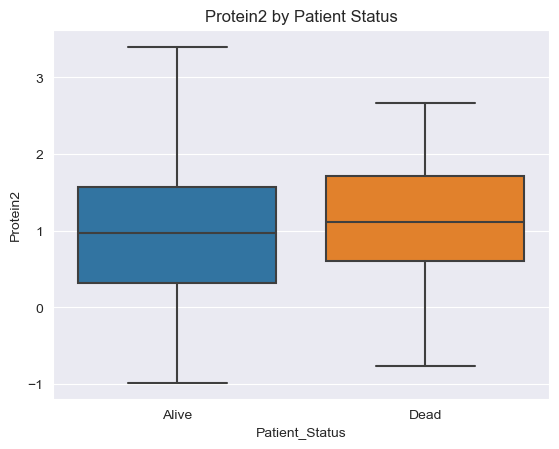

In [95]:
sns.boxplot(x='Patient_Status', y='Protein2', data=df)
plt.title('Protein2 by Patient Status')
plt.show()


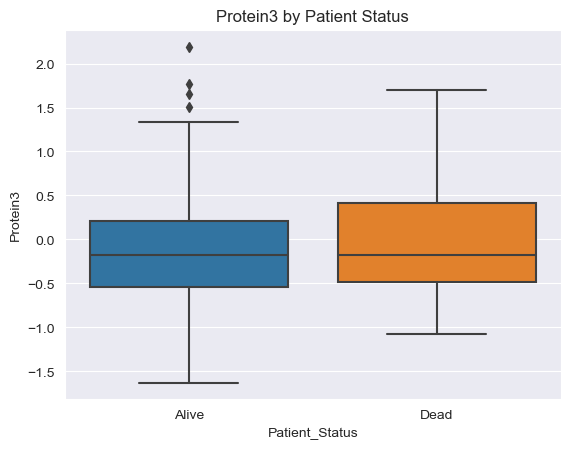

In [96]:
sns.boxplot(x='Patient_Status', y='Protein3', data=df)
plt.title('Protein3 by Patient Status')
plt.show()

<AxesSubplot:xlabel='Age'>

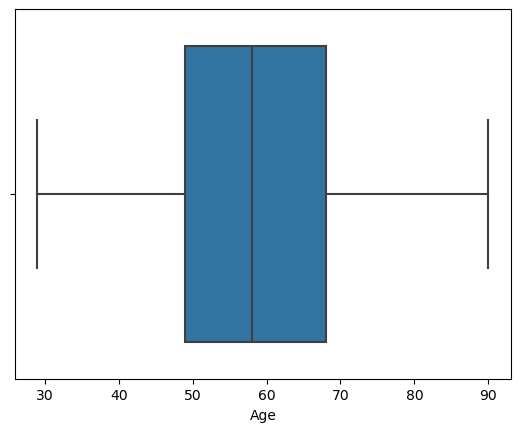

In [53]:
# we are checking outlires
sns.boxplot(x=df['Age'])


<AxesSubplot:xlabel='Protein1'>

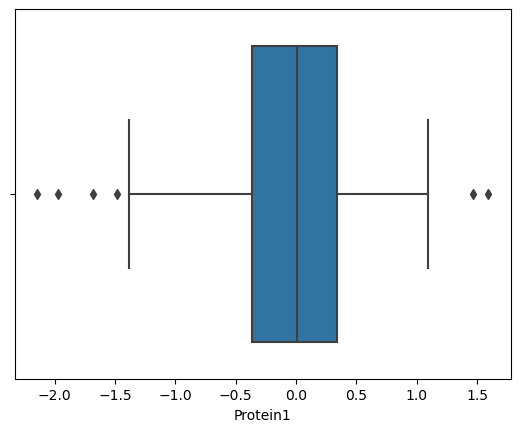

In [57]:
# we are checking outlires
sns.boxplot(x=df['Protein1'])

<AxesSubplot:xlabel='Protein2'>

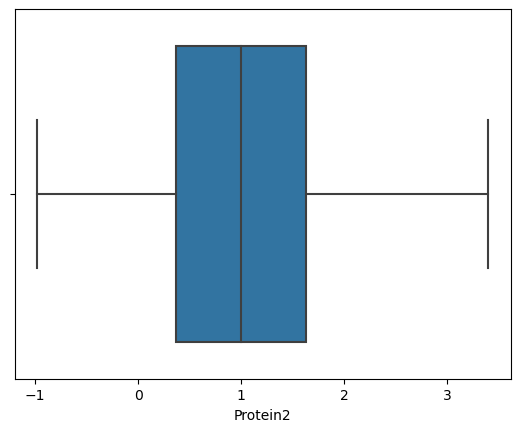

In [61]:
sns.boxplot(x=df['Protein2'])

<AxesSubplot:xlabel='Protein3'>

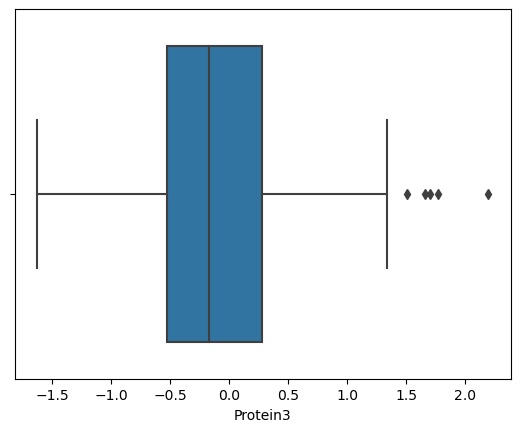

In [62]:
sns.boxplot(x=df['Protein3'])

<AxesSubplot:xlabel='Tumour_Stage', ylabel='count'>

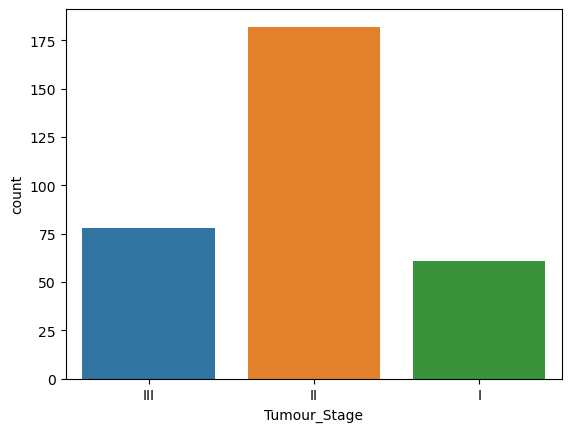

In [47]:
import seaborn as sns

sns.countplot(x='Tumour_Stage', data=df)


<AxesSubplot:xlabel='Age', ylabel='Protein1'>

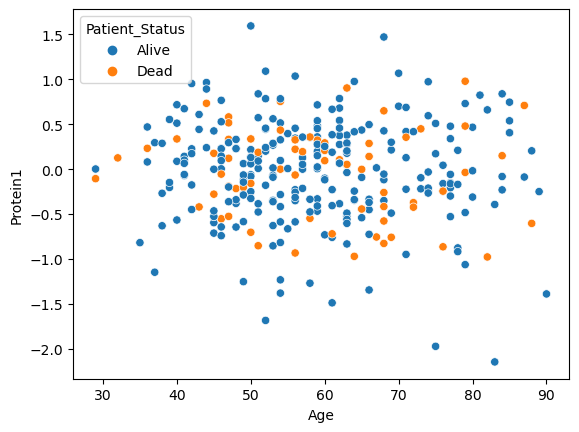

In [76]:
sns.scatterplot(x="Age", y="Protein1", hue="Patient_Status", data=df)


<AxesSubplot:xlabel='Age', ylabel='Protein2'>

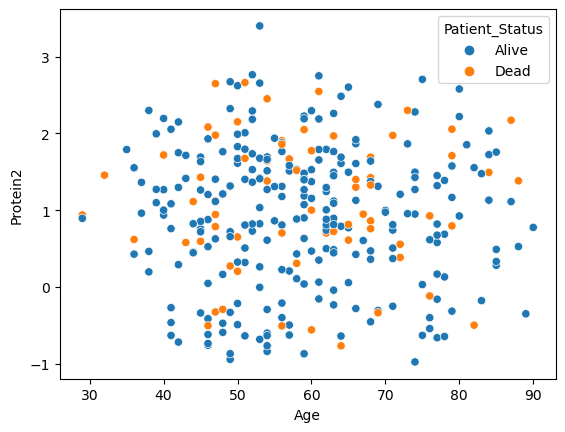

In [77]:
sns.scatterplot(x="Age", y="Protein2", hue="Patient_Status", data=df)


<AxesSubplot:xlabel='Age', ylabel='Protein3'>

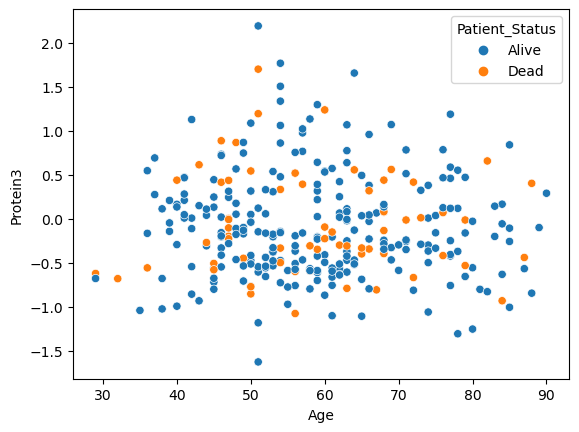

In [79]:
sns.scatterplot(x="Age", y="Protein3", hue="Patient_Status", data=df)


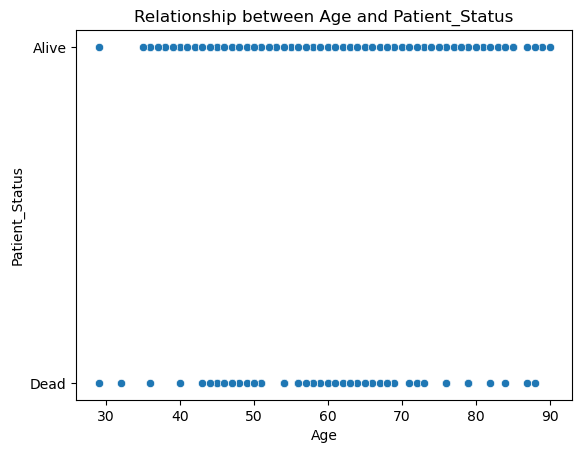

In [75]:
# Create a scatter plot with 'Turbidity' and 'Taste'
sns.scatterplot(x='Age', y='Patient_Status', data=df)

# Add axis labels and a title to the plot
plt.xlabel('Age')
plt.ylabel('Patient_Status')
plt.title('Relationship between Age and Patient_Status')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Patient_Status', ylabel='count'>

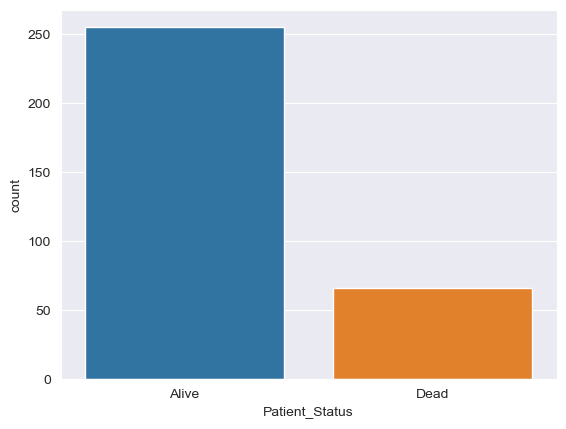

In [80]:
sns.set_style(style='darkgrid')
sns.countplot(x='Patient_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

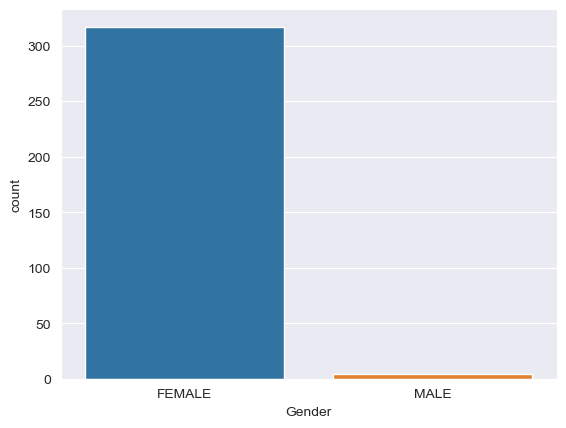

In [82]:
sns.set_style(style='darkgrid')
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

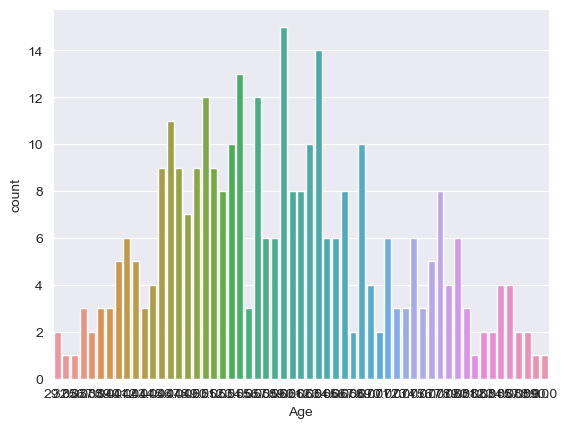

In [81]:
sns.set_style(style='darkgrid')
sns.countplot(x='Age',data=df)

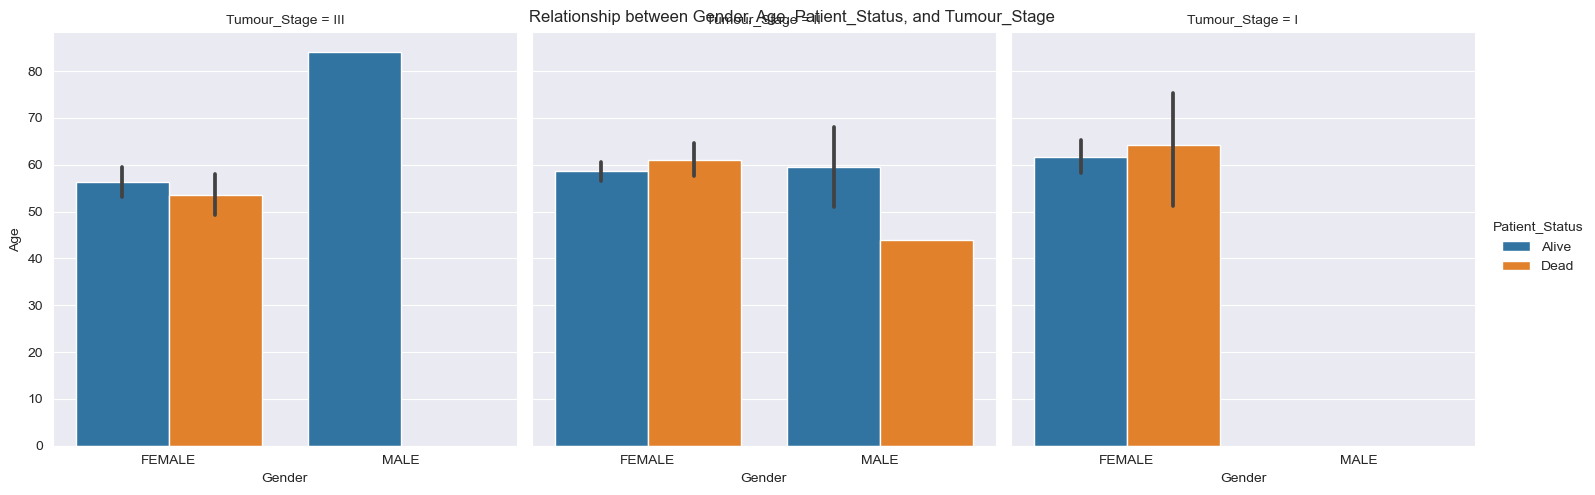

In [100]:
# Create a bar plot with 'Female', 'Age', 'Patient_Status', and 'Tumour_Stage'
sns.catplot(x='Gender', y='Age', hue='Patient_Status', col='Tumour_Stage', data=df, kind='bar')

# Add axis labels and a title to the plot
plt.xlabel('Gender')
plt.ylabel('Age')
plt.suptitle('Relationship between Gender, Age, Patient_Status, and Tumour_Stage')

# Show the plot
plt.show()


In [113]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# apply label encoding to each categorical column
df['Tumour_Stage'] = le.fit_transform(df['Tumour_Stage'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Histology'] = le.fit_transform(df['Histology'])
df['ER status'] = le.fit_transform(df['ER status'])
df['PR status'] = le.fit_transform(df['PR status'])
df['HER2 status'] = le.fit_transform(df['HER2 status'])
df['Surgery_type'] = le.fit_transform(df['Surgery_type'])
df['Patient_Status'] = le.fit_transform(df['Patient_Status'])

In [111]:
from sklearn.preprocessing import StandardScaler

# assume you have some data in a numpy array called 'data'
X = np.array(df)

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to your data
scaler.fit(X)

# apply the scaling to your data
X_scaled = scaler.transform(X)

# you can then check the mean and standard deviation of the scaled data
print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))


[ 2.04751411e-16  0.00000000e+00 -1.10676439e-17  1.16210261e-16
  1.10676439e-17 -1.66014658e-17  1.38345548e-16  2.49021987e-17
  0.00000000e+00  0.00000000e+00  2.21352877e-17 -2.76691096e-17
  2.76691096e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.]


## Train Test split

In [121]:
X = df.drop('Patient_Status', axis=1)  # assign all columns except 'Patient_Status' to X
y = df['Patient_Status']  # assign 'Patient_Status' to y


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [130]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])
print("Size of training data : ", y_train.shape[0])
print("Size of test data : ", y_test.shape[0])

Size of training data :  256
Size of test data :  65
Size of training data :  256
Size of test data :  65


In [132]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [133]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [134]:
X_pred=clf.predict(X_test)
X_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [141]:
decison_tree = DecisionTreeClassifier(random_state=3)
decison_tree.fit(X,y)


DecisionTreeClassifier(random_state=3)

In [142]:
predictions = decison_tree.predict(X)
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [143]:
from sklearn.metrics import accuracy_score

print("Decision Tree Accuracy : ", accuracy_score(y, predictions))

Decision Tree Accuracy :  1.0


In [147]:
!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [148]:
from sklearn.tree import export_graphviz
import graphviz

In [153]:
decison_tree.classes_

array([0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        53
           1       0.14      0.17      0.15        12

    accuracy                           0.66        65
   macro avg       0.47      0.47      0.47        65
weighted avg       0.68      0.66      0.67        65



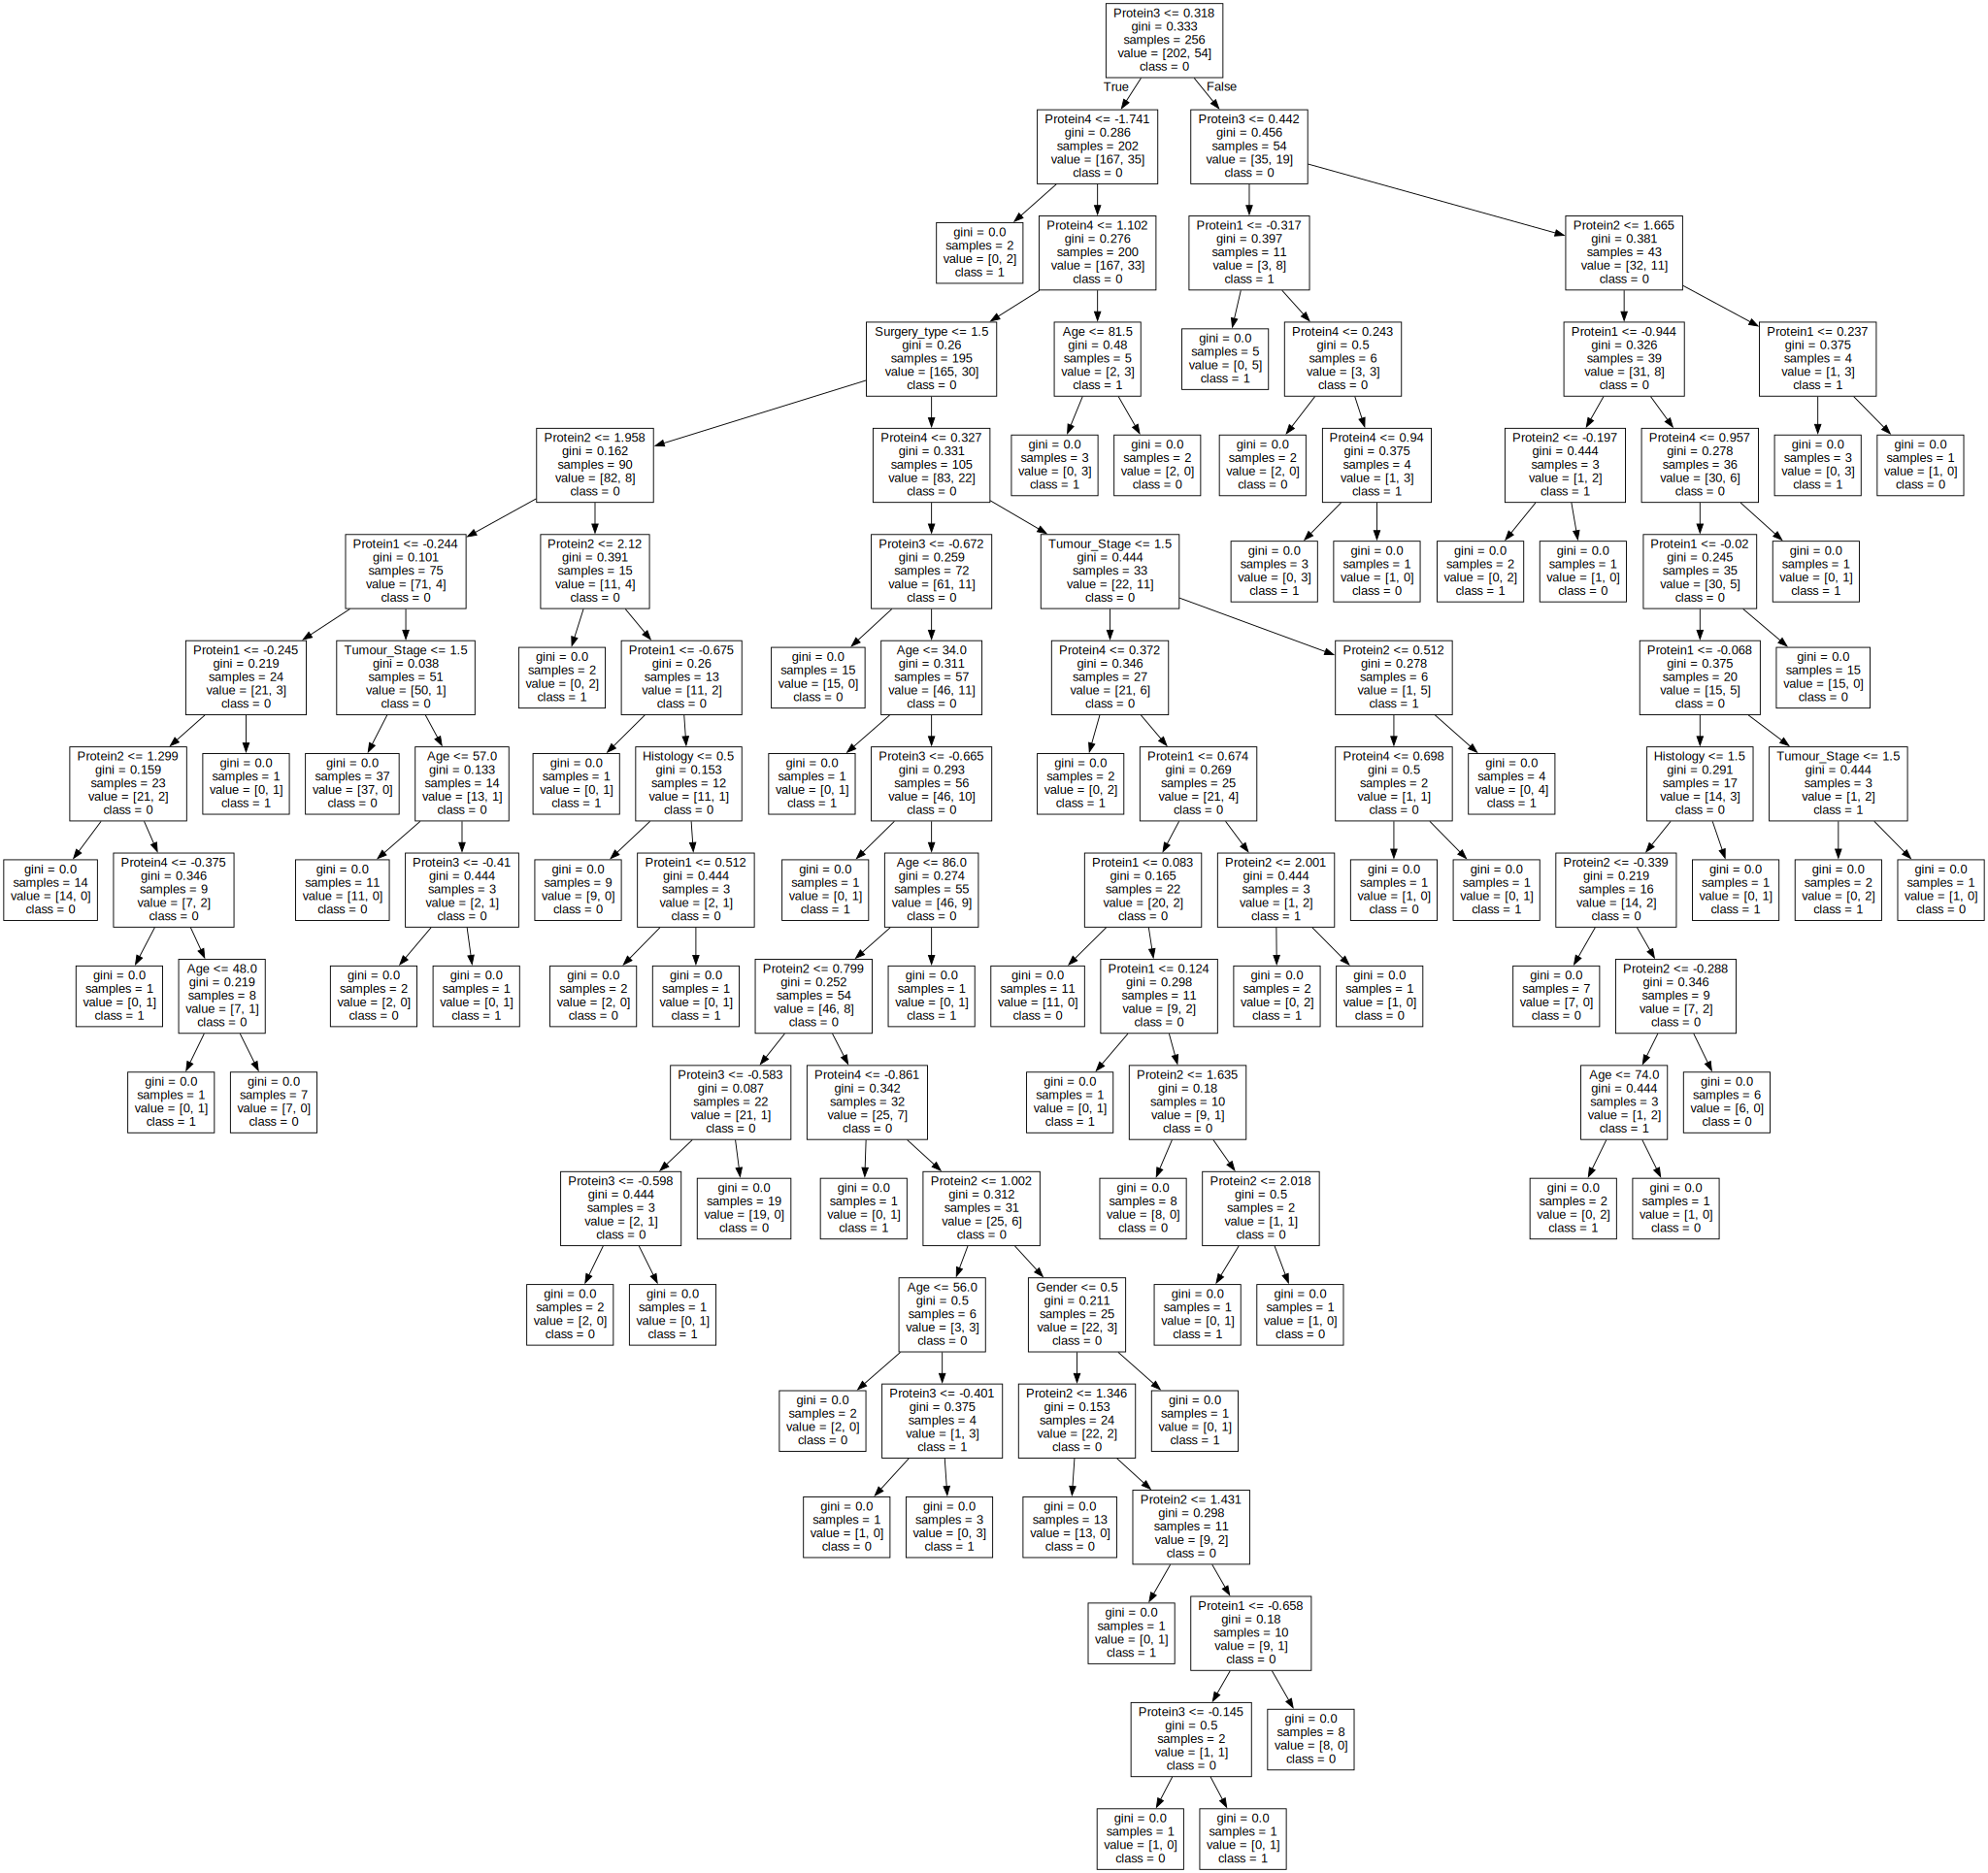

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import graphviz

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the training set
dtc.fit(X_train, y_train)

# Predict the classes of the test set samples
y_pred = dtc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Visualize the decision tree
viz_data = export_graphviz(dtc, feature_names=X.columns, class_names=["0", "1"])
tree = graphviz.Source(viz_data)
tree


In [157]:
fe_importances = pd.DataFrame({'feature':X.columns,'importance':np.round(decison_tree.feature_importances_,3)})
fe_importances = fe_importances.sort_values('importance',ascending=False)
fe_importances

,feature,importance
3,Protein2,0.286
2,Protein1,0.201
5,Protein4,0.171
4,Protein3,0.112
0,Age,0.090
11,Surgery_type,0.044
7,Histology,0.035
6,Tumour_Stage,0.030
1,Gender,0.016
10,HER2 status,0.015


In [158]:
dt_clf = DecisionTreeClassifier(max_depth = 2, random_state = 3)
dt_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=3)

In [159]:
predictions = dt_clf.predict(X)
print("Decision Tree Accuracy : ", accuracy_score(y, predictions))

Decision Tree Accuracy :  0.8037383177570093


In [160]:
# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.46%
